In [5]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Importing Basic Libraries

In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [11]:
## reading the dataset
df = pd.read_csv('OnlineNewsPopularity.csv')

In [12]:
df.head()   ## checking first 5 roles

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# PCA

PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

## Scaling

In [7]:
df.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [13]:
df2 = df.drop('url',axis=1)  ##making new Dataframe without url column

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -1.81071884,
         0.13891975, -0.24102756],
       [ 1.75788035, -0.66165665, -0.61879381, ...,  0.83774863,
        -0.68965812, -0.23087859],
       [ 1.75788035, -0.66165665, -0.71219192, ...,  0.83774863,
        -0.68965812, -0.16301816],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ..., -1.56994907,
        -0.08705603, -0.12861489],
       [-1.61808342, -2.08076053,  0.28759248, ...,  0.83774863,
        -0.68965812, -0.19742142],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

## Apply PCA

In [14]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

.95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [15]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
df_scaled_pca = pca.transform(df_scaled)

In [17]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

38

In [18]:
# variance by each component
pca.explained_variance_.round(2)

array([4.88, 4.13, 3.61, 3.  , 2.81, 2.59, 2.54, 2.29, 2.13, 2.08, 2.  ,
       1.89, 1.66, 1.39, 1.37, 1.24, 1.23, 1.21, 1.19, 1.17, 1.13, 1.09,
       1.05, 0.98, 0.91, 0.87, 0.81, 0.72, 0.68, 0.66, 0.61, 0.57, 0.56,
       0.53, 0.47, 0.46, 0.44, 0.41])

In [19]:
# explained variance ratio in terms of percentage of each PC component
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

array([8.1, 6.9, 6. , 5. , 4.7, 4.3, 4.2, 3.8, 3.5, 3.5, 3.3, 3.1, 2.8,
       2.3, 2.3, 2.1, 2. , 2. , 2. , 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.4, 1.2, 1.1, 1.1, 1. , 1. , 0.9, 0.9, 0.8, 0.8, 0.7, 0.7])

In [20]:
# Cumulative explained variance ratio

# if i want to capture 80 percent variance i use this
np.cumsum(exp_var)

array([ 8.1, 15. , 21. , 26. , 30.7, 35. , 39.2, 43. , 46.5, 50. , 53.3,
       56.4, 59.2, 61.5, 63.8, 65.9, 67.9, 69.9, 71.9, 73.9, 75.8, 77.6,
       79.3, 80.9, 82.4, 83.8, 85.2, 86.4, 87.5, 88.6, 89.6, 90.6, 91.5,
       92.4, 93.2, 94. , 94.7, 95.4])

In [23]:
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

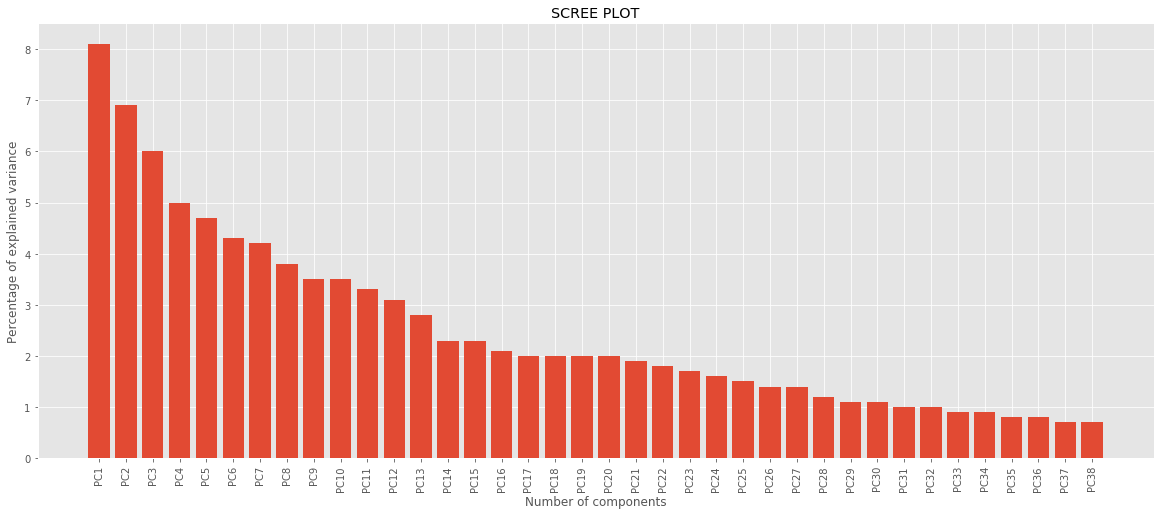

In [24]:
plt.figure(figsize=(20,8))
s = plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.title("SCREE PLOT")
plt.xticks(rotation=90 )
plt.show()

In [25]:
# pca
df_scaled_pca

array([[-1.34648179, -1.92109268, -1.96165114, ..., -0.05711869,
         0.18727658, -0.80930013],
       [ 0.21200733, -4.32405381, -1.08692318, ...,  0.86675434,
         0.01389532, -0.41399143],
       [-3.71738   , -3.53324826, -1.70058596, ..., -0.57026173,
        -0.69138673, -0.68377003],
       ...,
       [ 0.47004952,  2.63954765,  0.0234722 , ..., -0.89567761,
        -0.57005601,  1.0408702 ],
       [ 3.58087321,  0.20797442, -3.17201431, ..., -0.23334651,
         0.10592143,  1.21826544],
       [ 0.7852592 ,  0.62248651,  2.27154452, ..., -0.67127838,
        -0.45231596,  1.14452101]])

# Clustering

## Partitioning Clustering - KMeans

### Finding the right number of clusters

In [26]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled_pca)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.273929e+06
1,2,2.156553e+06
2,3,2.037518e+06
3,4,1.937320e+06
4,5,1.859721e+06
5,6,1.795680e+06
6,7,1.676816e+06
7,8,1.629850e+06
8,9,1.593447e+06


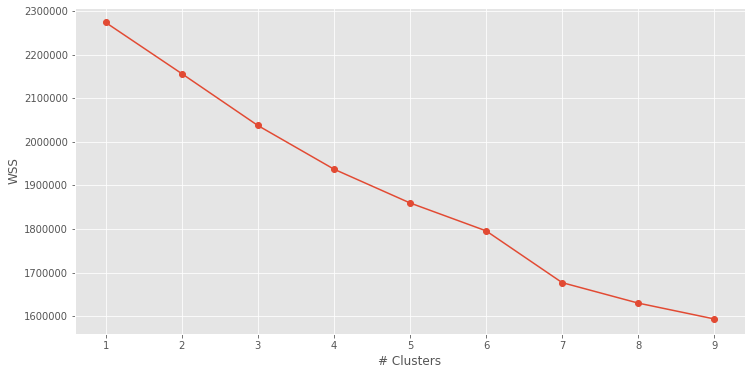

In [27]:
plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

### Building Cluster model

In [28]:
# kcluster=KMeans(n_clusters=5, random_state=0)
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
k_means.fit(df_scaled_pca)
labels = k_means.labels_
print(labels)

[0 2 3 ... 0 1 0]


### Adding Cluster Labels of the dataset

In [29]:
df2["Clus_km"] = labels
df2.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


In [23]:
df2['Clus_km'].value_counts()

0    12978
3     9464
1     9266
2     7935
4        1
Name: Clus_km, dtype: int64

# Multi-Class Classification

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro, mannwhitneyu

In [26]:
# checking for 

## Splitting the data

In [26]:
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


In [31]:
y = df2['Clus_km']
X = df2.drop(['Clus_km'], axis=1)

## Checking for class 


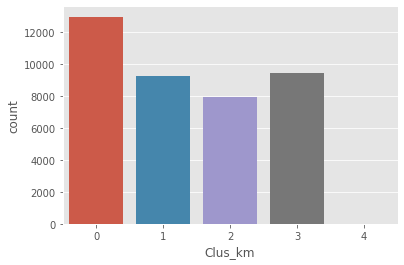

In [28]:
sns.countplot(data=df2, x='Clus_km')
plt.show()

In [29]:
df2['Clus_km'].value_counts(normalize=True, ascending=False)*100  ## as per percentage cluster number

0    32.736354
3    23.872465
1    23.373020
2    20.015639
4     0.002522
Name: Clus_km, dtype: float64

In [31]:
# We see that class 4, is much lesser than the rest of the classes.

### spliting into X and y

In [30]:
y = df2['Clus_km']
X = df2.drop(['Clus_km'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [32]:
print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (27750, 60)
Training y Shape: (27750,)
Testing X Shape: (11894, 60)
Testing y Shape: (11894,)


## MODELING 

In [33]:
lr = LogisticRegression()
gb = GaussianNB()
models = []
models.append(('LogisticRegression',lr))
models.append(('NaviveBayes',gb))

LogisticRegression : 0.399758(0.000057)
NaviveBayes : 0.297889(0.000155)


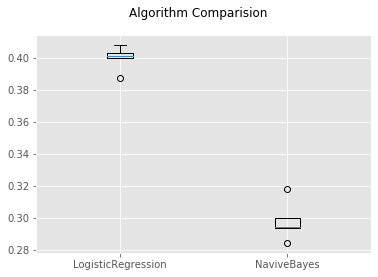

In [34]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(cv_results), np.var(cv_results,ddof=1)))
# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### LogisticRegression

In [35]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

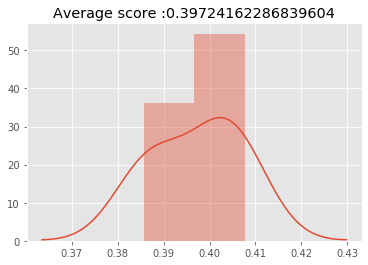

In [36]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(lr, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### GaussianNB

In [37]:
gb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(gb, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
print(np.mean(results))

0.2978888484544383


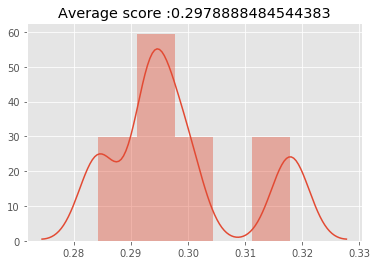

In [39]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(gb, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### DECISIONTREE CLASSIFIER

In [40]:
auc_avg = []
auc_var = []
for ne in np.arange(1,10):
    DT = DecisionTreeClassifier(random_state = 0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(DT, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))

In [41]:
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))

Min Bias Error: 0.05367305298604452  n_estimator: 1  Variance Error: 3.7885894206430464e-06
Bias Error: 0.05367305298604452  n_estimator: 1 Min Variance Error: 3.7885894206430464e-06


In [42]:
DT.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

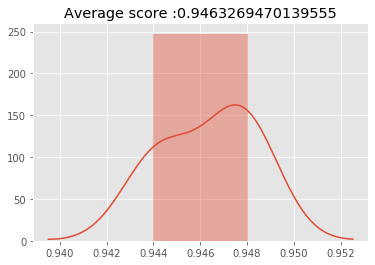

In [43]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(DT, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### ADABOOSTCLASSIFIER

In [44]:
auc_avg = []
auc_var = []
for ne in np.arange(1,30):
    ab_dt = AdaBoostClassifier(n_estimators= ne,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(ab_dt, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))

In [45]:
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))

Min Bias Error: 0.08910162807414856  n_estimator: 21  Variance Error: 0.0002507207273158402
Bias Error: 0.6022247924339741  n_estimator: 1 Min Variance Error: 2.3359368619585296e-05


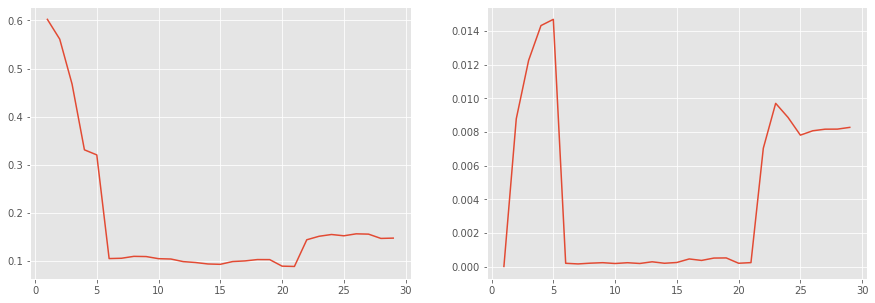

In [46]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
sns.lineplot(np.arange(1,30), auc_avg, ax=axes[0])
sns.lineplot(np.arange(1,30), auc_var, ax=axes[1])
plt.show()

In [47]:
ab_dt = AdaBoostClassifier(n_estimators= 21,random_state=0)

In [48]:
ab_dt.fit(X,y)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=21, random_state=0)

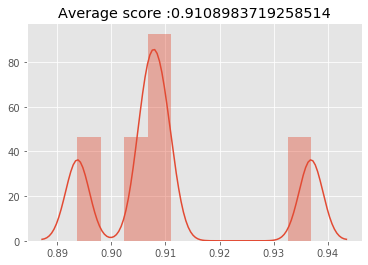

In [49]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(ab_dt, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### BaggingClassifier(base_estimator=DT)

In [50]:
auc_avg = []
auc_var = []
for ne in np.arange(1,20):
    bgcl_dt = BaggingClassifier(base_estimator=DT, random_state=0, n_estimators=ne)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(bgcl_dt, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))


Min Bias Error: 0.036193759966206884  n_estimator: 19  Variance Error: 9.354151821400655e-07
Bias Error: 0.03669893746818931  n_estimator: 17 Min Variance Error: 8.91770962937553e-07


In [51]:
bgcl_dt = BaggingClassifier(base_estimator=DT, random_state=0, n_estimators=19)

bgcl_dt.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
   

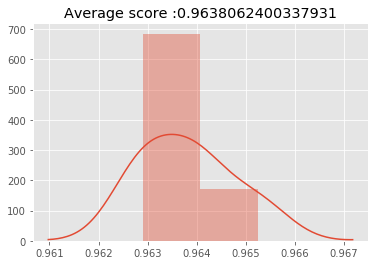

In [52]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(bgcl_dt, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### GradientBoostingClassifier

In [53]:
auc_avg = []
auc_var = []
for ne in np.arange(1,30):
    gbcl = GradientBoostingClassifier(random_state=0, n_estimators=ne)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(gbcl, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))


Min Bias Error: 0.04013627704555278  n_estimator: 29  Variance Error: 2.1824131710634827e-06
Bias Error: 0.04347508529339128  n_estimator: 23 Min Variance Error: 1.8052464106468984e-06


In [54]:
gbcl = GradientBoostingClassifier(random_state=0,n_estimators=29)

gbcl.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=29,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

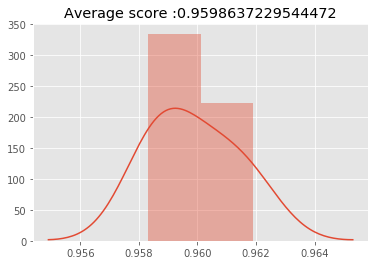

In [55]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(gbcl, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### RandomForestClassifier

In [56]:
auc_avg = []
auc_var = []
for ne in np.arange(1,40):
    RF=RandomForestClassifier(n_estimators=ne,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    auc = cross_val_score(RF, X, y, cv=kfold, scoring='f1_weighted')
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))
    
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))

Min Bias Error: 0.03551201817062888  n_estimator: 35  Variance Error: 6.557381656170396e-07
Bias Error: 0.03634192225888633  n_estimator: 30 Min Variance Error: 4.021168887524994e-07


In [33]:
RF=RandomForestClassifier(n_estimators=35,random_state=0)

RF.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

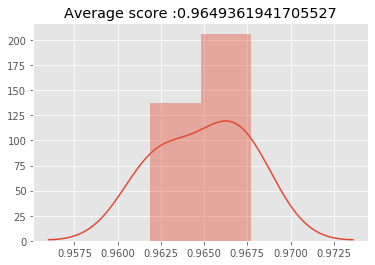

In [34]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(RF, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### AdaBoostClassifier(base_estimator=RF)

In [59]:
auc_avg = []
auc_var = []
RF= RandomForestClassifier(n_estimators=32,random_state=0)
for ne in np.arange(1,40):
    ab_rf = AdaBoostClassifier(base_estimator=RF,n_estimators= ne,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(ab_rf, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))


Min Bias Error: 0.03293094945531361  n_estimator: 4  Variance Error: 7.78431454359001e-07
Bias Error: 0.0332591715309517  n_estimator: 3 Min Variance Error: 3.679148734365546e-07


In [35]:
ab_rf = AdaBoostClassifier(base_estimator=RF,n_estimators= 4,random_state=0)

ab_rf.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

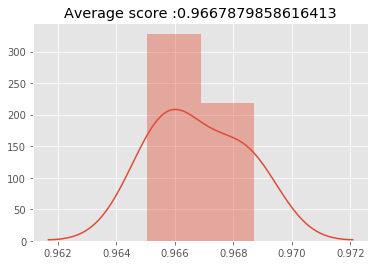

In [36]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(ab_rf, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

### BaggingClassifier(base_estimator=RF)

### XGBoost CLASSIFIER

In [49]:
import xgboost as xgb

x_dmatrix=xgb.DMatrix(data=X,label=y)

In [57]:
params={"eta"    : 0.1 ,
         "max_depth"        : 8,
         "min_child_weight" : 3, 
         "gamma"            : 10,
         "colsample_bytree" :0.5,
        }

In [61]:
cv_results = xgb.cv(dtrain=x_dmatrix, params=params, nfold=5,
                    num_boost_round=1000,early_stopping_rounds=50, as_pandas=True, seed=0)

cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
584,0.298807,0.001937,0.347650,0.006142
585,0.298807,0.001937,0.347650,0.006142
586,0.298807,0.001937,0.347650,0.006142
587,0.298807,0.001937,0.347650,0.006142
588,0.298751,0.001885,0.347609,0.006205


In [62]:
xg_reg = xgb.XGBClassifier(objective ='multi:softprob', colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight = 3,
                max_depth = 8, alpha = 1, n_estimators = 588,gamma=10)

xg_reg.fit(X,y)

XGBClassifier(alpha=1, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=588, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

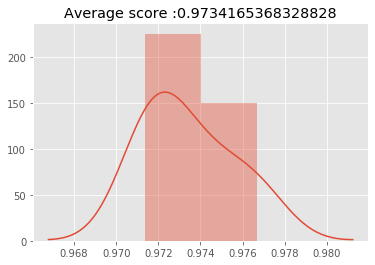

In [63]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(xg_reg, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

## RESULT 

###### F1-SCORE
* Logistic Regression      : 39.72%
* Gussian                  : 29.78%
* Decision Tree            : 94.63%
* Adaboost Decision Tree   : 91.09%
* Bagging Decision Tree    : 96.38%
* Gradient Boosting        : 95.98%
* RandomForest             : 96.49%
* Adaboost RandomForest    : 96.67%
* XgBoost                  : 97.34%

#### FROM THE ABOVE RESULT WE CAN SAY THAT XGBOOST GIVES THE BEST RESULT FOR THE MULTICLASS  LASSIFICATION 